In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sn 

In [2]:
web_data = pd.read_csv("DataSets/online_shoppers_intention.csv")
web_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
web_data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [4]:
X = web_data.iloc[ : , [5,6]] 
X

,ProductRelated_Duration,BounceRates
0,0.000000,0.200000
1,64.000000,0.000000
2,0.000000,0.200000
3,2.666667,0.050000
4,627.500000,0.020000
...,...,...
12325,1783.791667,0.007143
12326,465.750000,0.000000
12327,184.250000,0.083333
12328,346.000000,0.000000


In [5]:
X = X.values
X 

array([[0.0000000e+00, 2.0000000e-01],
       [6.4000000e+01, 0.0000000e+00],
       [0.0000000e+00, 2.0000000e-01],
       ...,
       [1.8425000e+02, 8.3333333e-02],
       [3.4600000e+02, 0.0000000e+00],
       [2.1250000e+01, 0.0000000e+00]])

In [6]:
from sklearn.cluster import KMeans

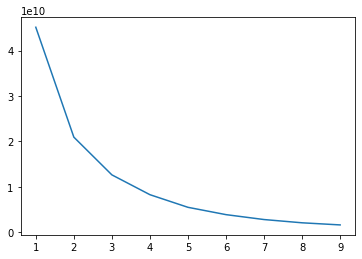

In [7]:
SSE = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(X)
    SSE.append(km.inertia_)
plt.plot(range(1,10),SSE)

In [8]:
km = KMeans(n_clusters=2)
km.fit(X)
cluster = km.predict(X)
cluster

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
data = {
    "ProductRelated_Duration": X[:,0],
    "BounceRates": X[:,1],
    "Cluster_No": cluster
}

In [10]:
df = pd.DataFrame(data = data)

In [11]:
df

,ProductRelated_Duration,BounceRates,Cluster_No
0,0.000000,0.200000,0
1,64.000000,0.000000,0
2,0.000000,0.200000,0
3,2.666667,0.050000,0
4,627.500000,0.020000,0
...,...,...,...
12325,1783.791667,0.007143,0
12326,465.750000,0.000000,0
12327,184.250000,0.083333,0
12328,346.000000,0.000000,0


Text(0, 0.5, 'Bounce Rates')

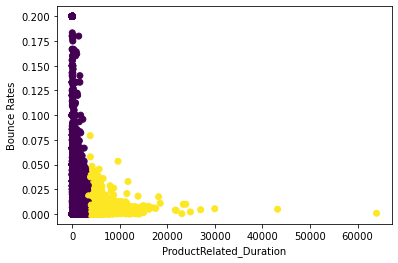

In [12]:
plt.scatter(df.ProductRelated_Duration,df.BounceRates,c = df.Cluster_No)
plt.xlabel("ProductRelated_Duration")
plt.ylabel('Bounce Rates')

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
truth = le.fit_transform(web_data.Revenue)


<AxesSubplot:>

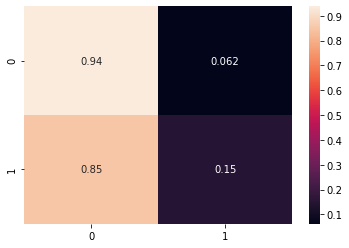

In [24]:
predicted = df.Cluster_No.values 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predicted,normalize= "true")
sn.heatmap(cm,annot=True)
 